# GOLD on MCX

MCX, the Multi-Commodity eXchange of India, has a number of gold futures contracts listed. This is how you explore them on pluto.

In [ ]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(RPostgres)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)
library(reshape2)
library(ggrepel)
library(ggpubr)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")
source("goofy/misc.common.R")

#initialize
commoditiesFnO <- CommodityFuturesAndOptions()

In [ ]:
#list all gold contracts on the MCX

goldMcx <- commoditiesFnO$McxEod() %>%
    filter(CONTRACT %like% '%gold%' & (OTYPE == 'XX' | OTYPE == 'FUTCOM')) %>%
    group_by(CONTRACT) %>%
    summarize(ST = min(TIME_STAMP, na.rm=T), ET = max(TIME_STAMP, na.rm=T)) %>%
    arrange(ST) %>%
    collect()

goldMcx %>%
    print(n=Inf)

Of these the first two - GOLD and GOLD MINI - are the oldest and represent gold of 1 kg and 100 grams with 995 purity. GOLD MINI has expirations every month whereas GOLD doesn't. GOLDGUINEA and GOLDPETAL were introduced much later in 2008 and 2011, respectively. We will cycle through these four contracts: GOLD, GOLDM, GOLDGUINEA and GOLDPETAL below.

Here's a cheat-sheet:
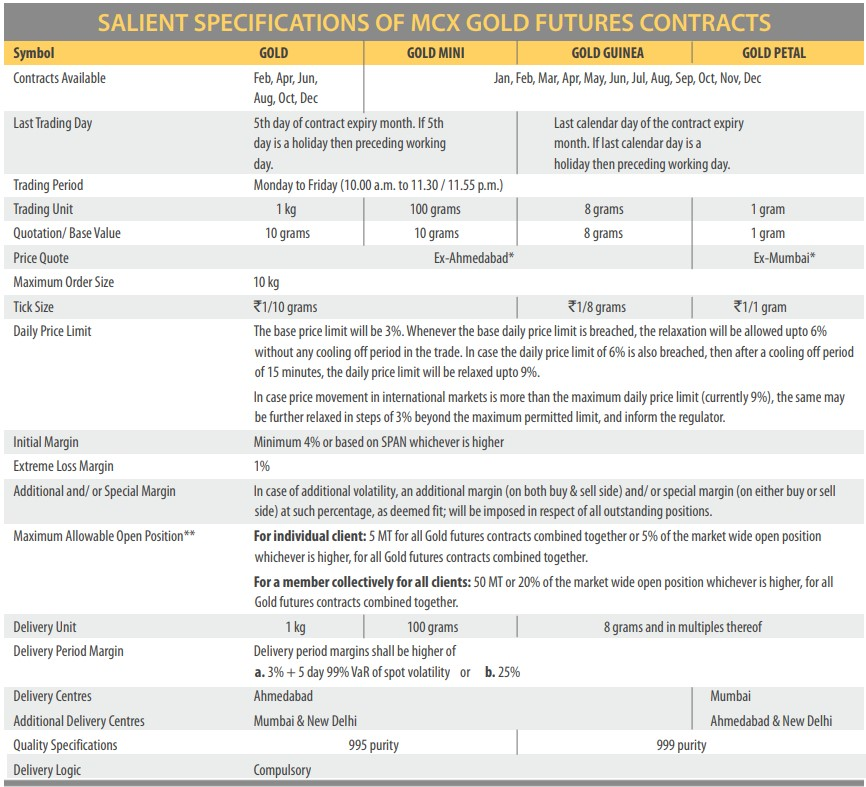

In [ ]:
expirySeries <- 0 # closest expiry
contractNames <- c('GOLD', 'GOLDM', 'GOLDGUINEA', 'GOLDPETAL')

In [ ]:
plotTimeSeries <- function(cName){
    px <- commoditiesFnO$McxEod() %>%
        filter(CONTRACT == cName & (OTYPE == 'XX' | OTYPE == 'FUTCOM') & EXPIRY_SERIES == expirySeries) %>%
        select(TIME_STAMP, CLOSE, VOLUME) %>%
        collect() %>%
        as.data.frame()
    
    firstDate <- min(px$TIME_STAMP)
    lastDate <- max(px$TIME_STAMP)
    xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

    p1 <- ggplot(px, aes(x=TIME_STAMP, y=CLOSE)) +
        theme_economist() +
        geom_line() +
        scale_y_log10() +
        scale_x_date(breaks = xAxisTicks) +
        labs(x='', y='log(price)', color='', fill='', 
             title='', subtitle=sprintf("[%s:%s]", firstDate, lastDate))
        
    p2 <- ggplot(px, aes(x=TIME_STAMP, y=VOLUME)) +
        theme_economist() +
        geom_bar(stat="identity") +
        scale_x_date(breaks = xAxisTicks) +
        labs(x='', y='volume', color='', fill='')
    
    figure <- ggarrange(p1, p2, labels=c("Price", "Volume"), ncol=1, nrow=2)
    figure <- annotate_figure(figure, 
                    top = text_grob(cName, face = "bold", size = 14, family='Segoe UI'), 
                    bottom = text_grob("@StockViz", face="bold", size=12, family="Segoe UI", color='grey'))
    print(figure)
}

In [ ]:
#plotTimeSeries('GOLD')
for(cName in contractNames) plotTimeSeries(cName)

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)